In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import concurrent.futures

In [2]:
isocronas = pd.read_csv('../../Isocronas/Regression_Iso.txt', header = 0)

In [3]:
from scipy.interpolate import interp1d

In [4]:
f1 = interp1d(isocronas['(B-V)TurnOff'],  isocronas['Age'],kind= 'linear')

In [5]:
#plt.scatter( isocronas['Age'], isocronas['(B-V)TurnOff'],   cmap = 'RdYlBu_r')

## Aglomerado 2, E(B-V)=0.5

In [6]:
ag2 = pd.read_csv('../P1/LinearRegressAG2.txt', header = 0)
E = 0.5
ag2.head()

,Slope,Intercept,Slope_Error,Intercept_Error,TurnOffColor
0,5.854872,6.137198,0.023602,0.030893,0.329951


In [7]:
idade2 = f1(ag2['TurnOffColor ']-E)
idade2

array([7.7995101])

In [8]:
idade2 = np.around(idade2,1)[0]
idade2

7.8

In [9]:
isocro2 = isocronas[isocronas['Age'] ==idade2]
isocro2

,Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(B-V)TurnOff,MvTurnOff,Ajustadas/Total
37,7.8,5.909142,0.94259,0.046907,0.027805,0.999811,-0.17,-1.25,0.16666666666666666= 8/48


In [10]:
## Método do Slope do Aglomerado
def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)
d2 = distancia(ag2['Slope'].item(), ag2[' Intercept'].item(), isocro2['Intercept'].item(),E)
d2

206.25702587588438

In [11]:
i2 = pd.read_csv('../P1/ag2.txt',header = 0)
i2.head()

,B-V,V
0,1.110742,12.999174
1,0.426737,8.766554
2,1.962863,16.706395
3,1.812563,16.906182
4,1.062060,11.962806


In [12]:
len(i2)

428

In [13]:
iso = pd.read_csv('../../Isocronas/isocro.csv', header = 0)

idades = iso['log(Age)']
age = np.array([])
for element in idades:
    if element in age:
        continue
    elif element not in age:
        age = np.append(age,element)

iso2 = iso[iso['log(Age)']==idade2]

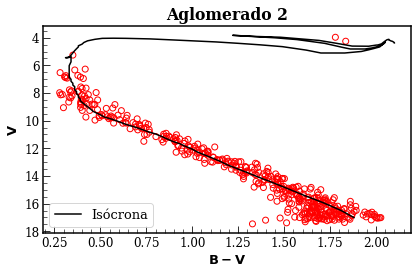

In [39]:
from matplotlib.ticker import AutoMinorLocator


plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.5


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots() #(figsize=(7,5))
plt.gca().invert_yaxis()
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] +5*np.log10(d2/10)+3.1*E , label = 'Isócrona', color = 'black', zorder = 10)
plt.scatter(i2['B-V'] ,i2['V'], color = 'none', edgecolor = 'red')
plt.legend(frameon=True)
plt.xlabel(r"$\mathbf{B-V}$")
plt.ylabel(r"$\mathbf{V}$")
plt.title('Aglomerado 2', fontweight = 'bold')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)
plt.tight_layout()
plt.savefig('../Im_Seminario/ag2_semcorrecao.png', format = 'png');

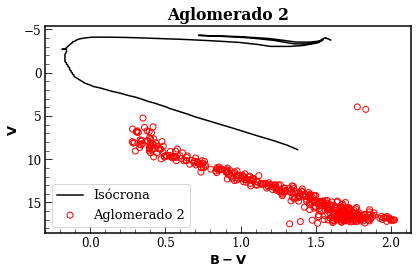

In [29]:
from matplotlib.ticker import AutoMinorLocator


plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.5


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots() #(figsize=(7,5))
plt.gca().invert_yaxis()
plt.plot(iso2['(B-V)o'],iso2['Mv'], label = 'Isócrona', color = 'black', zorder = 10)
plt.scatter(i2['B-V'] ,i2['V'], label = 'Aglomerado 2', color = 'none', edgecolor = 'red')
plt.legend(frameon=True)
plt.xlabel(r"$\mathbf{B-V}$")
plt.ylabel(r"$\mathbf{V}$")
plt.title('Aglomerado 2', fontweight = 'bold')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)
plt.tight_layout()
plt.savefig('../Im_Seminario/ag2_semcorrecao.png', format = 'png');

In [15]:
def jpt(X,Y):
    array = (X - Y) 
    array = np.sum(array**2, axis = 1)
    A, B = np.partition(array, 1)[0:2]
    C = np.where(array==A)[0][0]
    D = np.where(array==B)[0][0]
    return C,D


def frayn(X1,X2,X3):
    h = 2*((X3[0]-X1[0])*(X2[1]-X1[1]) - (X3[1]-X1[1])*(X2[0]-X1[0]))/np.sqrt(dist(X1,X2))
    return h**2

def dist(X,Y):
    distancia = 0
    for j in range(len(X)):
        distancia+= (X[j] - Y[j])**2
    return distancia


In [16]:
modulodist_inicial = 5*np.log10(d2/10) + E*3.1

arrays_de_incremento = np.arange(0,4.05,0.05)

subtracao_distancias = np.concatenate((-1*np.flip(arrays_de_incremento[1:]),arrays_de_incremento))
modulo_distancia = subtracao_distancias + modulodist_inicial

Yiso = np.zeros((len(modulo_distancia), len(iso2)))

for i in range(len(modulo_distancia)):
    Yiso[i] = iso2['Mv'] + modulo_distancia[i]

Xiso = np.zeros_like(Yiso)
Xiso[:] = iso2['(B-V)o'] + E

ISO = np.dstack((Xiso,Yiso))
ISO = np.unique(ISO,axis=1)

Xaglo = i2['B-V'] 
Yaglo = i2['V']
AGLO = np.vstack((Xaglo,Yaglo)).T

chisquared = np.zeros_like(modulo_distancia)
Beauchamp = np.zeros_like(modulo_distancia)

start = time.time()
for i in range(len(ISO)):
    for j in range(len(AGLO)):
        C,D = jpt(AGLO[j],ISO[i])
        final = frayn(ISO[i][C], ISO[i][D],AGLO[j])
        chisquared[i] += final
        Beauchamp[i] += final*10**(-0.4*AGLO[j][1])

end = time.time()
print('Tempo decorrido: ', end-start)

Tempo decorrido:  2.088838577270508


Text(0.5, 0.98, 'Aglomerado 2 ')

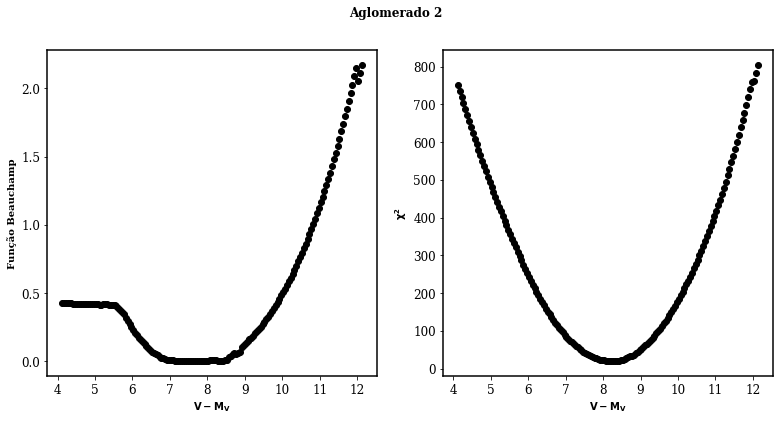

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (13,6))
ax1.scatter(modulo_distancia, Beauchamp, color = 'k')
ax2.scatter(modulo_distancia, chisquared, color = 'k')
ax1.set_xlabel(r'$ \mathbf{V - M_V}$')
ax2.set_xlabel(r'$ \mathbf{V - M_V}$')
ax1.set_ylabel('Função Beauchamp', fontweight = 'bold')
ax2.set_ylabel(r'$ \mathbf{\chi^2}$')

fig.suptitle('Aglomerado 2 ', fontweight = 'bold')


In [18]:
beau = np.where(Beauchamp==min(Beauchamp))[0]
noweight = np.where(chisquared==min(chisquared))[0] ## Definindo os valores onde a funcao definida é mínima

In [19]:
observado = 8 #V-Mv

minimo_beau = modulo_distancia[beau]
minimo_chi = modulo_distancia[noweight]
minimo_chi,minimo_beau

(array([8.27204376]), array([7.67204376]))

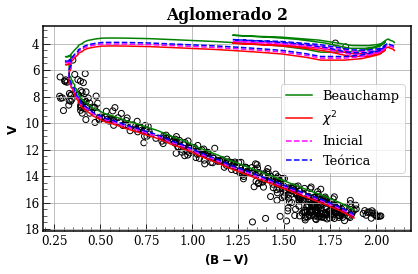

In [41]:


fig,ax = plt.subplots() #(figsize=(10,8))

from matplotlib.ticker import AutoMinorLocator


plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.5


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)



plt.gca().invert_yaxis()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


plt.plot(iso2['(B-V)o'] + E, iso2['Mv'] + minimo_beau , label = 'Beauchamp', color = 'green', zorder = 10)
plt.plot(iso2['(B-V)o'] + E, iso2['Mv'] + minimo_chi , label = r'$ \chi^2 $', color = 'red', zorder = 10)  
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + modulodist_inicial , '--', label = 'Inicial', color = 'magenta', zorder = 10)
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + observado , '--', label = 'Teórica', color = 'blue', zorder = 10)
plt.scatter(i2['B-V'] ,i2['V'], color = 'none', edgecolor = 'black')
plt.legend(frameon=True)
plt.xlabel(r"$ \mathbf{(B-V)}$")
plt.ylabel(r"$ \mathbf{V}$");
ax.grid()
plt.title('Aglomerado 2', fontweight ='bold')
plt.tight_layout()
plt.savefig('../Im_Seminario/ag2_final.png', format = 'png')


In [21]:
BeauchampAGES = np.zeros_like(age)
chisquaredAGES = np.zeros_like(age)

start = time.time()
for j in range(len(age)):
    data = iso[iso['log(Age)'] == age[j]]
    Xiso = np.array(data['(B-V)o'] + E)
    Yiso = np.array(data['Mv'] + minimo_chi)
    ISO = (np.vstack((Xiso,Yiso)).T)
    ISO = np.unique(ISO, axis=0)
    for i in range(len(AGLO)):
        C,D = jpt(AGLO[i],ISO)
        final = frayn(ISO[C], ISO[D],AGLO[i])
        chisquaredAGES[j] += final
        BeauchampAGES[j] += final*10**(-0.4*AGLO[i][1])
end = time.time()
print('Tempo decorrido: ', end-start)

Tempo decorrido:  0.6795985698699951


Text(0.5, 0.98, 'Aglomerado 2')

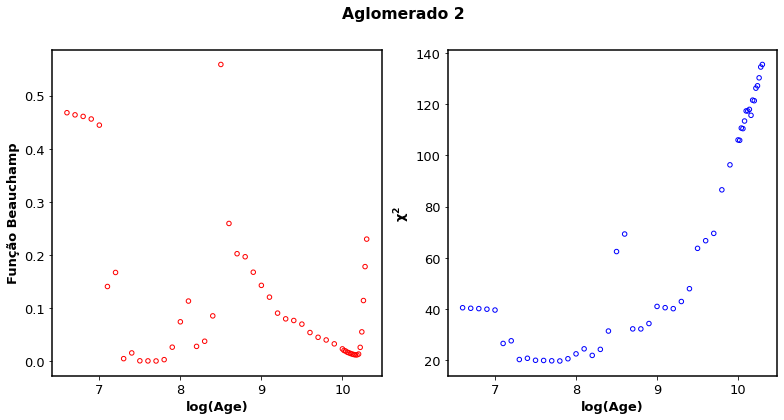

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (13,6))
ax1.scatter(age, BeauchampAGES, color = 'none', edgecolor = 'red', s = 20)
ax2.scatter(age, chisquaredAGES, color = 'none', edgecolor = 'blue', s = 20)
ax1.set_xlabel('log(Age)',  fontweight = 'bold')
ax2.set_xlabel('log(Age)',  fontweight = 'bold')
ax1.set_ylabel('Função Beauchamp',  fontweight = 'bold')
ax2.set_ylabel(r'$ \mathbf{\chi^2}$')
fig.suptitle('Aglomerado 2', fontweight = 'bold')

#from google.colab import files
#plt.savefig('aglomerado1chiAGES.png', format = 'png')
#files.download('aglomerado1chiAGES.png') 

In [23]:
newage = age[25:50]
newage

array([9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.9, 7.8,
       7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7, 6.6])

In [24]:
def chi_to_age(IDADE):
  data = iso[iso['log(Age)'] == IDADE]
  Yiso = np.zeros((len(modulo_distancia), len(data)))
  for k in range(len(modulo_distancia)):
    Yiso[k] = data['Mv'] + modulo_distancia[k]
  Xiso = np.zeros_like(Yiso)
  Xiso[:] = data['(B-V)o'] + E
  ISO = np.dstack((Xiso,Yiso))
  ISO = np.unique(ISO,axis=1)
  A = np.zeros(len(ISO))
  B = np.zeros(len(ISO))
  for i in range(len(ISO)):
    for j in range(len(AGLO)):
      C,D = jpt(AGLO[j],ISO[i])
      final = frayn(ISO[i][C], ISO[i][D],AGLO[j])
      A[i] += final
      #B[i] += final*10**(-0.4*AGLO[j][1])
  return A

In [25]:
start = time.time()
with concurrent.futures.ProcessPoolExecutor() as executor:
  results = executor.map(chi_to_age,newage)
end = time.time()

resultado = []
for i in results:
    resultado.append(i)
print(end-start)

13.875418424606323


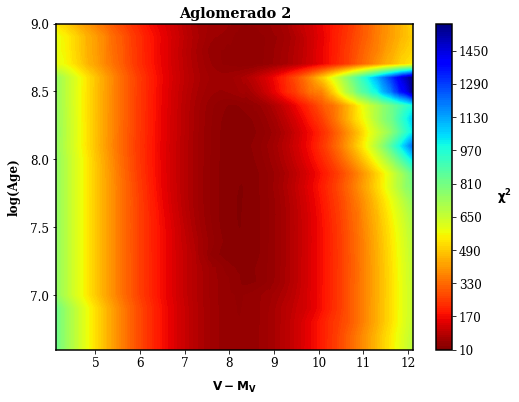

In [40]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)


import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import ImageGrid

z = resultado
x = modulo_distancia
y = newage

# Set colomap
cmap = cm.get_cmap('jet')
cmap = cm.jet_r

fig,ax = plt.subplots(figsize=(8,6)) #(figsize=(10,8))
levels = len(modulo_distancia)
im  = ax.contourf(x, y, z, levels= levels, antialiased=False, cmap=cmap)


cbar = fig.colorbar(im)
cbar.set_label(r'$ \mathbf{\chi^2}$', fontweight = 'bold', rotation=0, labelpad=15)
ax.set_xlabel(r'$ \mathbf{V - M_V}$', fontweight = 'bold', labelpad=10)
ax.set_ylabel('log(Age)', fontweight = 'bold', labelpad=10)
ax.set_title('Aglomerado 2', fontweight = 'bold')
plt.savefig('../Im_Seminario/ag2_chi.png', format = 'png')

In [27]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)


import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import ImageGrid
z = Beauchamp_n_ages 
x = modulo_distancia
y = newage

# Set colomap
cmap = cm.get_cmap('jet')
cmap = cm.jet

fig,ax = plt.subplots(figsize=(8,6)) #(figsize=(10,8))
levels = len(modulo_distancia)
im  = ax.contourf(x, y, z, levels= levels, antialiased=False, cmap=cmap)


cbar = fig.colorbar(im)
cbar.set_label('Beauchamp', fontweight = 'bold', rotation=270, labelpad=15)

ax.set_xlabel(r'$ \mathbf{V - M_V}$', fontweight = 'bold', labelpad=10)
ax.set_ylabel('log(Age)', fontweight = 'bold', labelpad=10)
ax.set_title('Aglomerado 2', fontweight = 'bold')
#plt.savefig('ag2_colourfill_teste_beau.png', format = 'png')

NameError: name 'Beauchamp_n_ages' is not defined

In [ ]:
Xaglo = i2['B-V'] 
Yaglo = i2['V']
AGLO = np.vstack((Xaglo,Yaglo)).T

Beauchamp_n_ages = np.zeros((len(newage),len(modulo_distancia)))
chisquared_n_ages = np.zeros((len(newage),len(modulo_distancia)))

start = time.time()
for w in range(len(newage)):
    data = iso[iso['log(Age)'] == newage[w]]
    Yiso = np.zeros((len(modulo_distancia), len(data)))
    for k in range(len(modulo_distancia)):
        Yiso[k] = data['Mv'] + modulo_distancia[k]
    Xiso = np.zeros_like(Yiso)
    Xiso[:] = data['(B-V)o'] + E
    ISO = np.dstack((Xiso,Yiso))
    ISO = np.unique(ISO,axis=1)
    chisquared = np.zeros_like(modulo_distancia)
    Beauchamp = np.zeros_like(modulo_distancia)
    for i in range(len(ISO)):
        for j in range(len(AGLO)):
            C,D = jpt(AGLO[j],ISO[i])
            final = frayn(ISO[i][C], ISO[i][D],AGLO[j])
            chisquared_n_ages[w][i] += final
            Beauchamp_n_ages[w][i] += final*10**(-0.4*AGLO[j][1])

end = time.time()
print('Tempo decorrido: ', end-start)
